<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 2: Linear Regression</h3>
<h3 align="center">27/09/2018</h3>

In [1311]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

#### Example 1: Linear Regression Visualization

In [1312]:
def create_basis(x, degree=1):
    x = np.asarray(x) #a 1d array
    X = [x**i for i in range(0,degree+1)] #include 0 as we want a column of 1s
    X = np.asarray(X).T
    return X

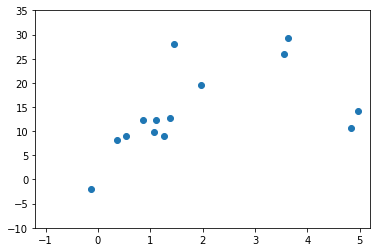

In [1313]:
#true model parameters
beta_true = np.asarray([1, 10, -0.5, 0.25, -0.1])

np.random.seed(50) ##to produce the same result each time, comment this line for a truely difference sample
no_of_points = 14

x = np.random.uniform(-1,5,no_of_points)
A_true= create_basis(x, degree=4)
y = np.dot(A_true,beta_true)
y += 4*np.random.normal(0,1,len(y)) #add a normally distributed noise with standard deviation of 4 (variance of 16)
plt.scatter(x,y)

#set plot limits for using later
x_lim = np.asarray([-1.2,5.2]) 
y_lim = np.asarray([-10,35])
plt.xlim(x_lim)
plt.ylim(y_lim)

plt.show()

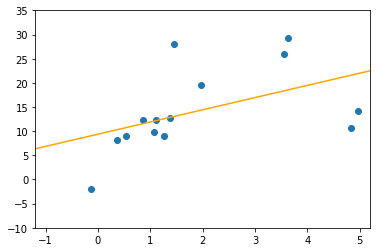

In [1314]:
#least square model
plt.scatter(x,y)

A_linear = create_basis(x, degree=1)
beta_linear = np.dot(np.dot(np.linalg.inv((np.dot(A_linear.T, A_linear))), A_linear.T), y)

x_lim_lin = x_lim
A_lim_lin = create_basis(x_lim_lin, degree=1)
y_lim_lin = np.dot(A_lim_lin, beta_linear)

plt.plot(x_lim_lin, y_lim_lin, c="orange")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

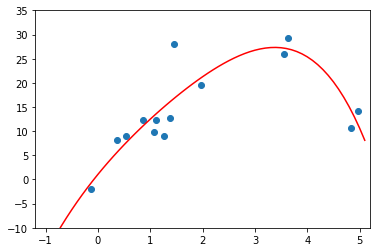

In [1315]:
#least square model for regression with 4th degree polynomial basis expansion
plt.scatter(x,y)

A_poly4 = create_basis(x, degree=4)
beta_poly4 = np.dot(np.dot(np.linalg.inv((np.dot(A_poly4.T, A_poly4))), A_poly4.T), y)

x_lim_p4 = np.arange(x_lim[0], x_lim[1], 0.1)
A_lim_p4 = create_basis(x_lim_p4, degree=4)
y_lim_p4 = np.dot(A_lim_p4, beta_poly4)

plt.plot(x_lim_p4, y_lim_p4, c="red")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

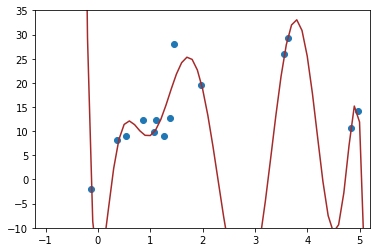

In [1316]:
#least square model for regression with 9th degree polynomial basis expansion
plt.scatter(x,y)

A_poly9 = create_basis(x, degree=9)
beta_poly9 = np.dot(np.dot(np.linalg.inv((np.dot(A_poly9.T, A_poly9))), A_poly9.T), y)

x_lim_p9 = np.arange(x_lim[0], x_lim[1], 0.1)#np.arange(min(x), max(x), 0.1)
A_lim_p9 = create_basis(x_lim_p9, degree=9)
y_lim_p9 = np.dot(A_lim_p9, beta_poly9)


plt.plot(x_lim_p9, y_lim_p9, c="brown")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

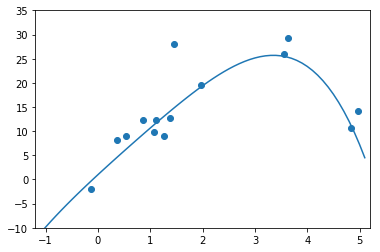

In [1317]:
#true model before adding noise
plt.scatter(x,y)

x_lim_true = np.arange(x_lim[0], x_lim[1], 0.1)
A_lim_true= create_basis(x_lim_true, degree=4)
y_true_model = np.dot(A_lim_true, beta_true)

plt.plot(x_lim_true, y_true_model)

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

#### Example 2: Ridge Regression (Run Example 1 to get the same model)

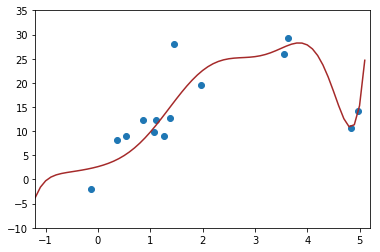

In [1318]:
#least square model for regression with 9th degree polynomial basis expansion, with regularizaion
plt.scatter(x,y)

A_poly9 = create_basis(x, degree=9)

lambda_ = 4
beta_poly9 = np.dot(A_poly9.T, A_poly9) + lambda_*np.eye(A_poly9.shape[1]);
beta_poly9 = np.linalg.inv(beta_poly9)
beta_poly9 = np.dot(beta_poly9, A_poly9.T)
beta_poly9 = np.dot(beta_poly9, y)

x_lim_p9 = np.arange(x_lim[0], x_lim[1], 0.1)#np.arange(min(x), max(x), 0.1)
A_lim_p9 = create_basis(x_lim_p9, degree=9)
y_lim_p9 = np.dot(A_lim_p9, beta_poly9)


plt.plot(x_lim_p9, y_lim_p9, c="brown")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

#### Example 3: Linear Regression using batch gradiend descent
1) load the dataset, shuffle it, split it into training set, validation set and test set

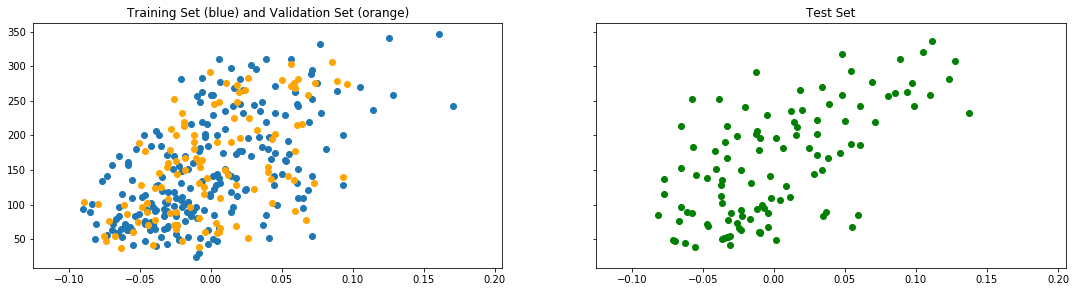

In [1319]:
#load the diabetes dataset from sklearn.datasets
diabetes = datasets.load_diabetes()

#use only one feature, choose some datapoints to be your validation set (normally, and another set to be the test set)
x_diabetes_ = diabetes.data[:, 2]
y_diabetes_ = diabetes.target

#shuffle the data before splitting it, to make sure it is not ordered
np.random.seed(20)
shuffle_order = np.random.permutation(x_diabetes_.shape[0])
x_diabetes_ = x_diabetes_[shuffle_order]
y_diabetes_ = y_diabetes_[shuffle_order]

#split the data into training set, validation set, and test set
val_size = round(len(x_diabetes_) * 0.25) #take 25% of the data as a validation set (around 60 samples)
test_size = round(len(x_diabetes_) * 0.25) #take another 25% of the data as a test set
x_diabetes = x_diabetes_[ : -(val_size + test_size)]
y_diabetes = y_diabetes_[ : -(val_size + test_size)]
x_diabetes_val = x_diabetes_[-(val_size + test_size) : -test_size]
y_diabetes_val = y_diabetes_[-(val_size + test_size) : -test_size]
x_diabetes_test = x_diabetes_[-test_size : ]
y_diabetes_test = y_diabetes_[-test_size : ]

#plot the data
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True)
ax1.scatter(x_diabetes, y_diabetes, c="C0")
ax1.scatter(x_diabetes_val, y_diabetes_val, c="orange")
ax1.set_title('Training Set (blue) and Validation Set (orange)')
ax2.scatter(x_diabetes_test, y_diabetes_test, c="green")
ax2.set_title('Test Set')
f.set_size_inches(18.5, 4.5)
plt.show()

2) Augment the data (add the 1's column for the bias, add the basis functions if any)

In [1320]:
#add the training set to the validation set as we don't tune any hyperparameter in this example
x_diabetes_train_val = np.concatenate((x_diabetes, x_diabetes_val))
y_diabetes_train_val = np.concatenate((y_diabetes, y_diabetes_val)) 

#add a column of 1 to the dataset for the bias term
degree = 1
X_diabetes_augmented = create_basis(x_diabetes_train_val, degree=degree)
X_diabetes_test_augmented = create_basis(x_diabetes_test, degree=degree)

learning_rate = 0.002

3) Standardize the data (according to the mean and the standard deviation of the training set)

In [1321]:
#standardize training data (without the 1's column)
x_mean = X_diabetes_augmented[:,1:].mean(axis=0)
x_std = X_diabetes_augmented[:,1:].std(axis=0)
X_diabetes_augmented[:,1:] = (X_diabetes_augmented[:,1:] - x_mean) / x_std
X_diabetes_test_augmented[:,1:] = (X_diabetes_test_augmented[:,1:] - x_mean) / x_std #use the mean and standard deviation of the training data not the test data

4) initialize the other parameters and hyperparameters

In [1322]:
#Initialize parameters and hyperparameters
train_size = X_diabetes_augmented.shape[0]
test_size = x_diabetes_test.shape[0]

beta_old = np.random.uniform(0,0.2,(degree+1))
beta_new = beta_old

loss_old = (y_diabetes_train_val - np.dot(X_diabetes_augmented, beta_old))
loss_old = np.dot(loss_old.T,loss_old) / train_size

delta_loss = -10000 #difference between new loss and old loss
iteration = 0
max_iterations = 30 #stop after how many iterations if the solution didn't converge

5) Train the model till update in beta is too small (smaller than delta_beta) or when the number of iterations reach max_iterations

Iteration no. 1, Mean Training RSS = 6492.82, Change in Mean RSS = -21644.873


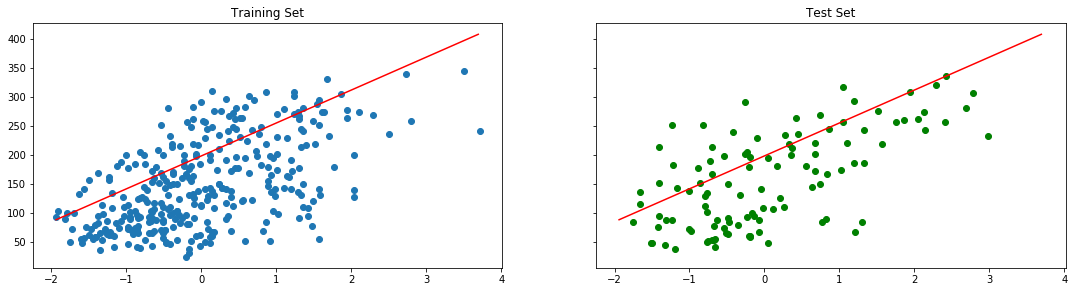

Iteration no. 2, Mean Training RSS = 4164.17, Change in Mean RSS = -2328.642


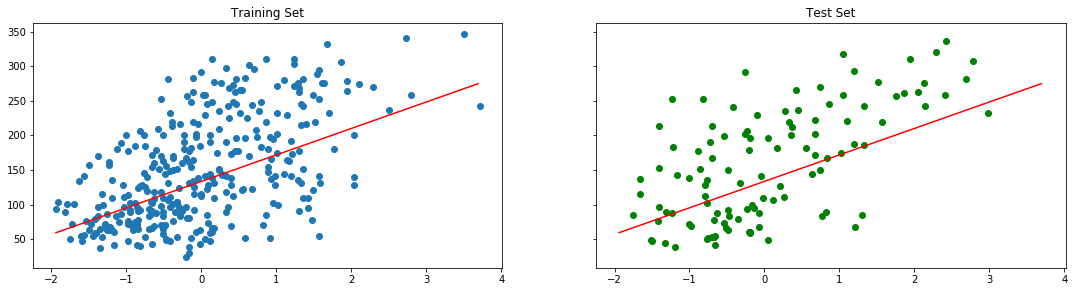

Iteration no. 3, Mean Training RSS = 3913.65, Change in Mean RSS = -250.525


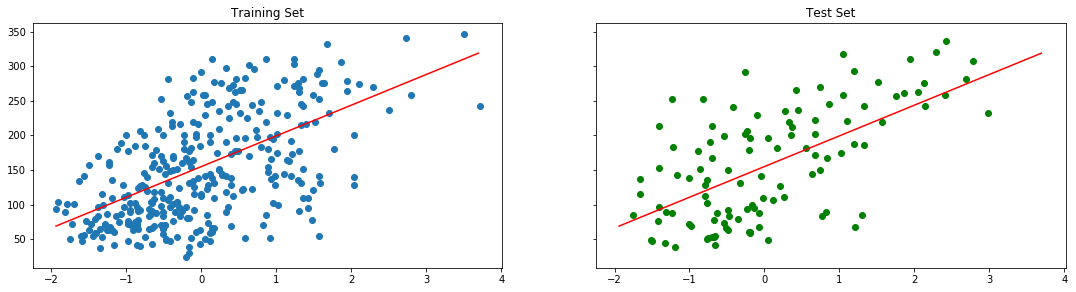

Iteration no. 4, Mean Training RSS = 3886.70, Change in Mean RSS = -26.952


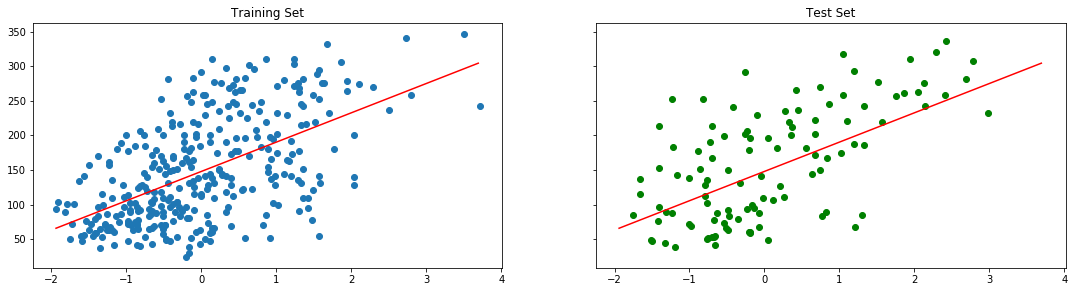

Iteration no. 5, Mean Training RSS = 3883.80, Change in Mean RSS = -2.900


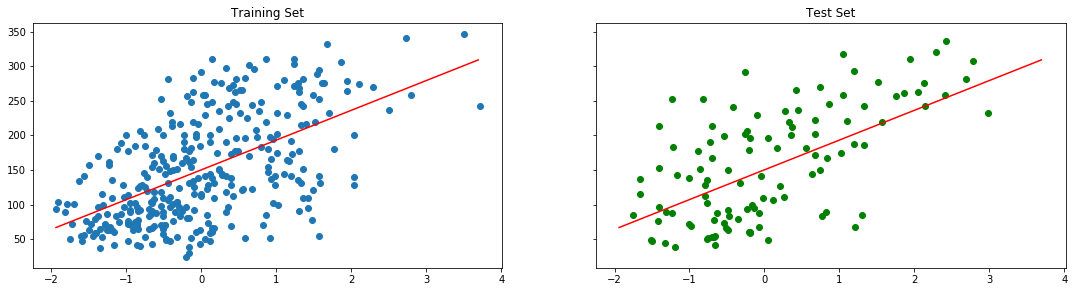

Iteration no. 6, Mean Training RSS = 3883.49, Change in Mean RSS = -0.312


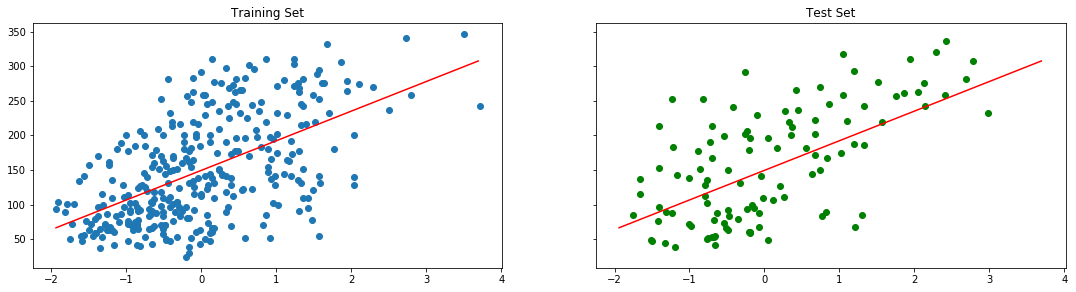

Iteration no. 7, Mean Training RSS = 3883.45, Change in Mean RSS = -0.034


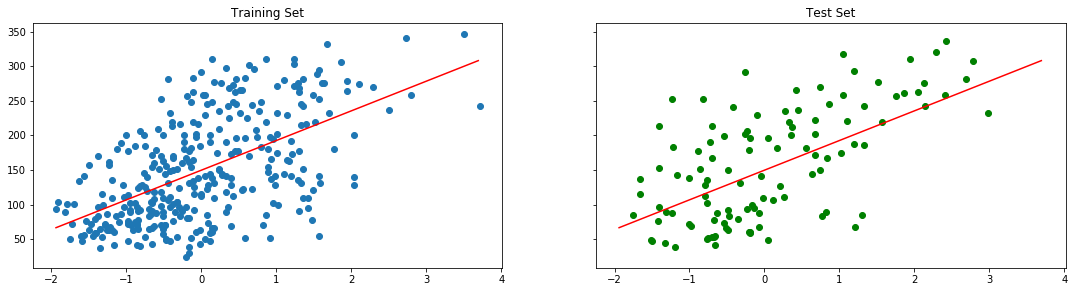

Iteration no. 8, Mean Training RSS = 3883.45, Change in Mean RSS = -0.004


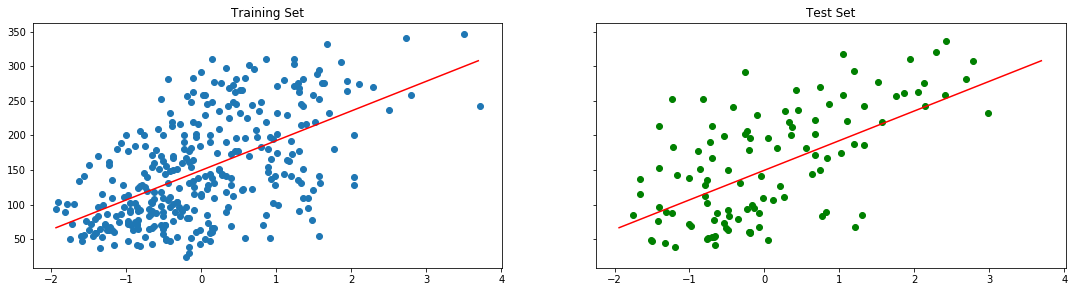

Mean Test RSS = 3926.97


In [1323]:
while (delta_loss < -0.01 and iteration < max_iterations): #stop condition
    gradient_loss = np.asarray(2 * np.dot(np.dot(X_diabetes_augmented.T, X_diabetes_augmented), beta_old) 
                               - 2 * np.dot(X_diabetes_augmented.T, y_diabetes_train_val))
    
    beta_new = beta_old - learning_rate * gradient_loss
    
    loss_new = (y_diabetes_train_val - np.dot(X_diabetes_augmented, beta_new))
    loss_new = np.dot(loss_new.T,loss_new) / train_size
    delta_loss = loss_new - loss_old
    loss_old = loss_new
    
    beta_old = beta_new
    
    iteration += 1
    
    print(f"Iteration no. {iteration}, Mean Training RSS = {loss_new:.2f}, Change in Mean RSS = {delta_loss:.3f}")
    
    #plot the data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True)
    ax1.scatter(X_diabetes_augmented[:,1], y_diabetes_train_val, c="C0")
    ax1.set_title('Training Set')
    ax2.scatter(X_diabetes_test_augmented[:,1], y_diabetes_test, c="green")
    ax2.set_title('Test Set')
    f.set_size_inches(18.5, 4.5)
    
    #plot the line
    limits = [min(x_diabetes_train_val), max(x_diabetes_train_val)]
    x_lim_ = np.arange(limits[0], limits[1], 0.01)
    A_lim_ = create_basis(x_lim_, degree = degree)
    A_lim_[:,1:] = (A_lim_[:,1:] - x_mean) / x_std
    y_lim_ = np.dot(A_lim_, beta_new)
    ax1.plot(A_lim_[:,1], y_lim_, c="red")
    ax2.plot(A_lim_[:,1], y_lim_, c="red")

    plt.show()

test_loss = (y_diabetes_test - np.dot(X_diabetes_test_augmented, beta_new))
test_loss = np.dot(test_loss.T,test_loss) / test_size
print(f"Mean Test RSS = {test_loss:.2f}")

### Exercises

#### Exercise 1: Linear Regression using stochastic gradiend descent
Repeat example 3 using stochastic gradient descent (run example 3 to load the data and stanrdize it)

Augment the data (add the 1's column for the bias, add the basis functions if any)

In [1324]:
#add the training set to the validation set as we don't tune any hyperparameter in this example
x_diabetes_train_val = np.concatenate((x_diabetes, x_diabetes_val))
y_diabetes_train_val = np.concatenate((y_diabetes, y_diabetes_val)) 

#add a column of 1 to the dataset for the bias term
degree = 1
X_diabetes_augmented = create_basis(x_diabetes_train_val, degree=degree)
X_diabetes_test_augmented = create_basis(x_diabetes_test, degree=degree)

learning_rate = 0.002

Standardize the data (according to the mean and the standard deviation of the training set)

In [1325]:
#standardize training data (without the 1's column)
x_mean = X_diabetes_augmented[:,1:].mean(axis=0)
x_std = X_diabetes_augmented[:,1:].std(axis=0)
X_diabetes_augmented[:,1:] = (X_diabetes_augmented[:,1:] - x_mean) / x_std
X_diabetes_test_augmented[:,1:] = (X_diabetes_test_augmented[:,1:] - x_mean) / x_std #use the mean and standard deviation of the training data not the test data

initialize the other parameters and hyperparameters

In [1326]:
#Initialize parameters and hyperparameters
train_size = X_diabetes_augmented.shape[0]
test_size = x_diabetes_test.shape[0]

beta_old = np.random.uniform(0,0.2,(degree+1))
beta_new = beta_old

loss_old = (y_diabetes_train_val - np.dot(X_diabetes_augmented, beta_old))
loss_old = np.dot(loss_old.T,loss_old) / train_size

delta_loss = -10000 #difference between new loss and old loss
iteration = 0
max_iterations = 30 #stop after how many iterations if the solution didn't converge

Train the model till update in beta is too small (smaller than delta_beta) or when the number of iterations reach max_iterations

In [1347]:
while (delta_loss < -0.01 and iteration < max_iterations): #stop condition
    random_order = np.random.permutation(X_diabetes_augmented.shape[0])
    for i in random_order:
        gradient_loss = -2 * (y_diabetes_train_val[i] - np.dot(X_diabetes_augmented[i,:], beta_old)) * X_diabetes_augmented[i,:]
        beta_new = beta_old - learning_rate * gradient_loss
        beta_old = beta_new
    
    iteration += 1
    
    loss_new = (y_diabetes_train_val - np.dot(X_diabetes_augmented, beta_new))
    loss_new = np.dot(loss_new.T,loss_new) / train_size
    delta_loss = loss_new - loss_old
    loss_old = loss_new
    
    print(f"SGD passed through the whole dataset {iteration} times, Mean Training RSS = {loss_new:.2f}, \
Change in Mean RSS = {delta_loss:.3f}")
    
    #plot the data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True)
    ax1.scatter(X_diabetes_augmented[:,1], y_diabetes_train_val, c="C0")
    ax1.set_title('Training Set')
    ax2.scatter(X_diabetes_test_augmented[:,1], y_diabetes_test, c="green")
    ax2.set_title('Test Set')
    f.set_size_inches(18.5, 4.5)
    
    #plot the line
    limits = [min(x_diabetes_train_val), max(x_diabetes_train_val)]
    x_lim_ = np.arange(limits[0], limits[1], 0.01)
    A_lim_ = create_basis(x_lim_, degree = degree)
    A_lim_[:,1:] = (A_lim_[:,1:] - x_mean) / x_std
    y_lim_ = np.dot(A_lim_, beta_new)
    ax1.plot(A_lim_[:,1], y_lim_, c="red")
    ax2.plot(A_lim_[:,1], y_lim_, c="red")

    plt.show()
    
test_loss = (y_diabetes_test - np.dot(X_diabetes_test_augmented, beta_new))
test_loss = np.dot(test_loss.T,test_loss) / test_size
print(f"Mean Test RSS = {test_loss:.2f}")

Mean Test RSS = 3967.83


#### Exercise 2: Use validation for determining lambda_ridge of a 20th order polynomial basis function
Use same dataset as in exercise 1

Augment the data (add the 1's column for the bias, add the basis functions if any)

In [1337]:
#add the training set to the validation set as we don't tune any hyperparameter in this example
x_diabetes_train = x_diabetes
y_diabetes_train = y_diabetes

#add a column of 1 to the dataset for the bias term, and create the basis expansion
degree = 20
X_diabetes_augmented = create_basis(x_diabetes_train, degree=degree)
X_diabetes_val = create_basis(x_diabetes_val, degree=degree)
X_diabetes_test = create_basis(x_diabetes_test, degree=degree)

Standardize the data (according to the mean and the standard deviation of the training set)

In [1338]:
#standardize training data (without the 1's column)
x_mean = X_diabetes_augmented[:,1:].mean(axis=0)
x_std = X_diabetes_augmented[:,1:].std(axis=0)
X_diabetes_augmented[:,1:] = (X_diabetes_augmented[:,1:] - x_mean) / x_std
X_diabetes_val[:,1:] = (X_diabetes_val[:,1:] - x_mean) / x_std #use the mean and standard deviation of the training data not the validation data
X_diabetes_test[:,1:] = (X_diabetes_test[:,1:] - x_mean) / x_std #use the mean and standard deviation of the training data not the test data

initialize the other parameters and hyperparameters

In [1344]:
#Initialize parameters and hyperparameters
train_size = X_diabetes_augmented.shape[0]
val_size = X_diabetes_val.shape[0]
test_size = x_diabetes_test.shape[0]

lambda_ridge_range = [2**i for i in range(-20,5)]

validation_loss = {}
iteration = 0

Train the model

Iteration no. 1, lambda_ridge = 9.5367431640625e-07, Mean Train RSS = 3607.6398331441283, Mean Validation RSS = 4212.590048910727


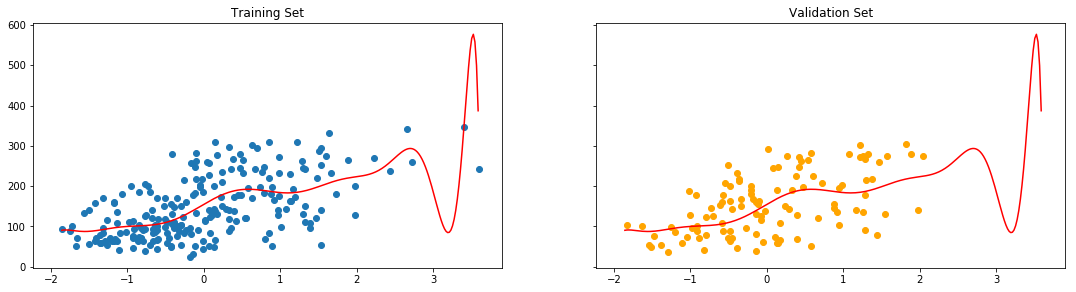

Iteration no. 2, lambda_ridge = 1.9073486328125e-06, Mean Train RSS = 3612.54223872986, Mean Validation RSS = 4209.145796296818


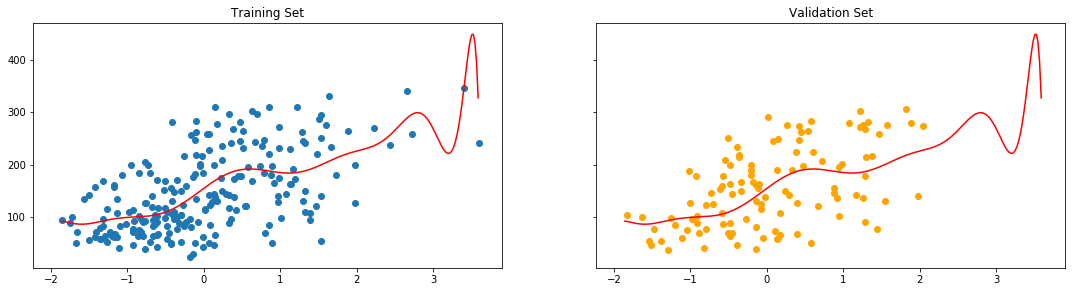

Iteration no. 3, lambda_ridge = 3.814697265625e-06, Mean Train RSS = 3617.389806411376, Mean Validation RSS = 4206.232821588019


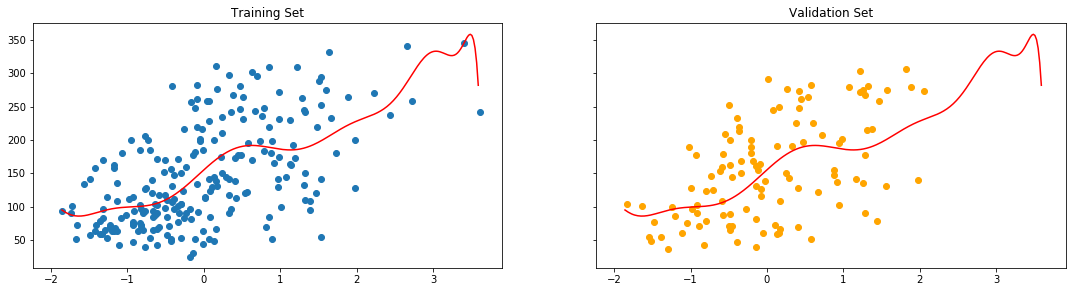

Iteration no. 4, lambda_ridge = 7.62939453125e-06, Mean Train RSS = 3621.4614796283013, Mean Validation RSS = 4204.099476329116


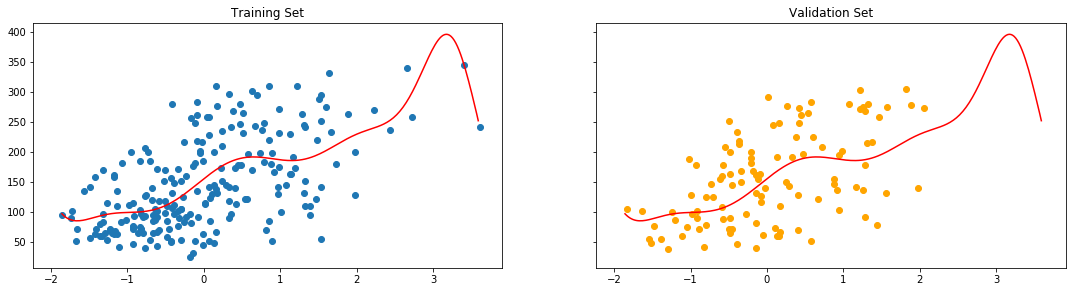

Iteration no. 5, lambda_ridge = 1.52587890625e-05, Mean Train RSS = 3624.375209558138, Mean Validation RSS = 4202.244420053409


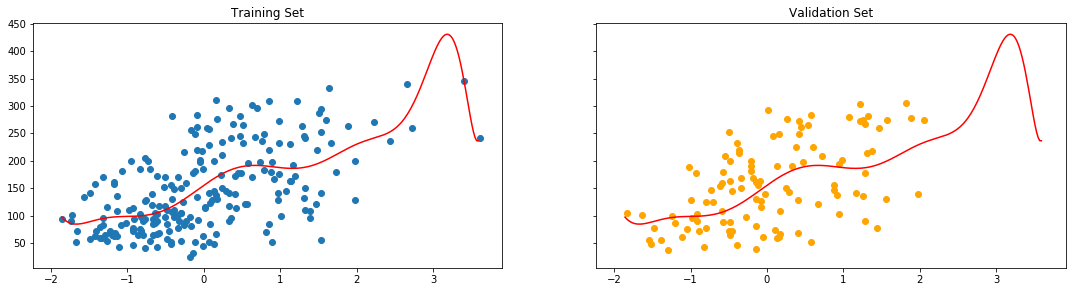

Iteration no. 6, lambda_ridge = 3.0517578125e-05, Mean Train RSS = 3626.4220545203857, Mean Validation RSS = 4199.9756851163365


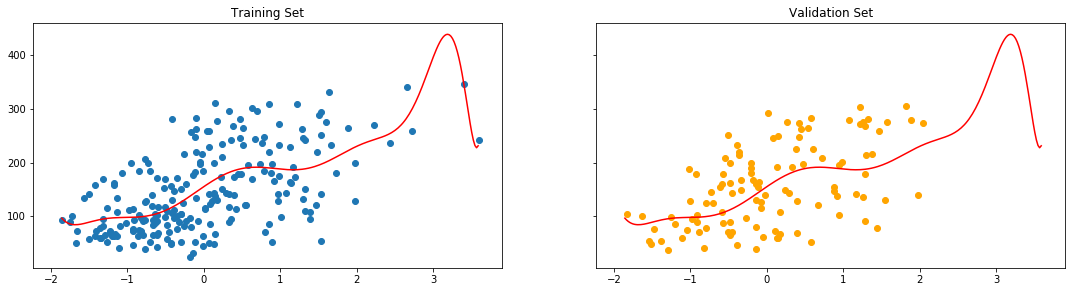

Iteration no. 7, lambda_ridge = 6.103515625e-05, Mean Train RSS = 3628.3375090884037, Mean Validation RSS = 4196.882779972811


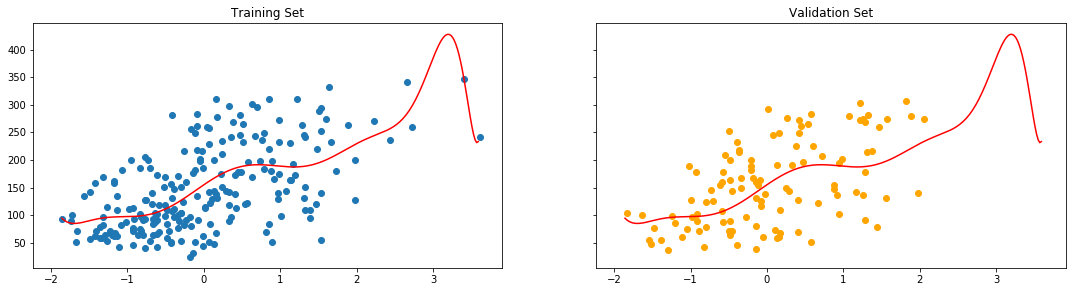

Iteration no. 8, lambda_ridge = 0.0001220703125, Mean Train RSS = 3631.0246476063144, Mean Validation RSS = 4193.253046653921


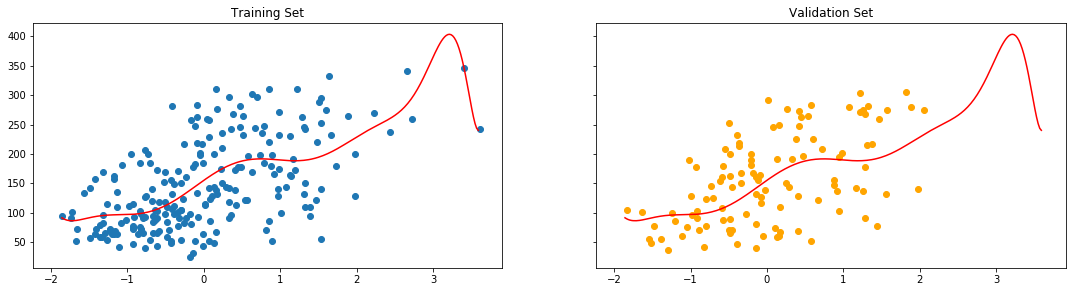

Iteration no. 9, lambda_ridge = 0.000244140625, Mean Train RSS = 3634.946963994551, Mean Validation RSS = 4189.946016740623


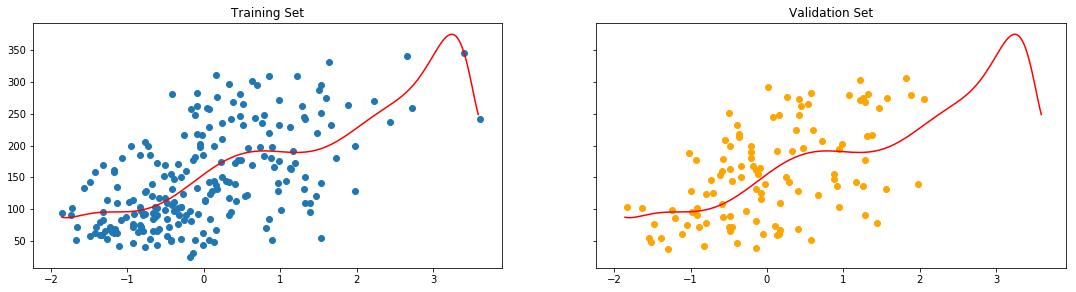

Iteration no. 10, lambda_ridge = 0.00048828125, Mean Train RSS = 3639.4806062545945, Mean Validation RSS = 4187.361632908544


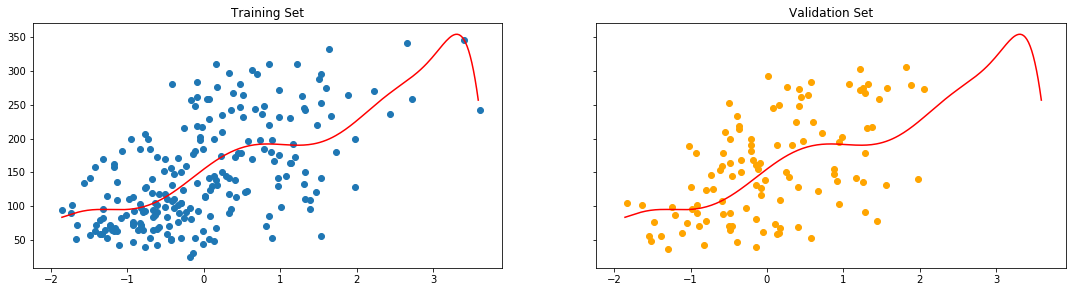

Iteration no. 11, lambda_ridge = 0.0009765625, Mean Train RSS = 3643.4935750679224, Mean Validation RSS = 4184.765471166555


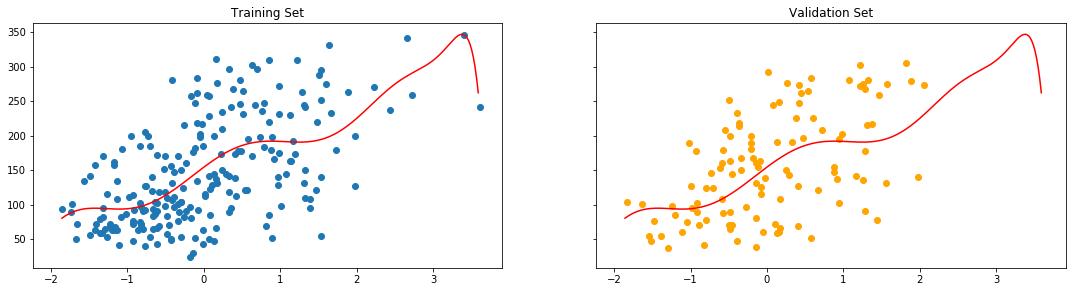

Iteration no. 12, lambda_ridge = 0.001953125, Mean Train RSS = 3646.5043033714633, Mean Validation RSS = 4180.685261302361


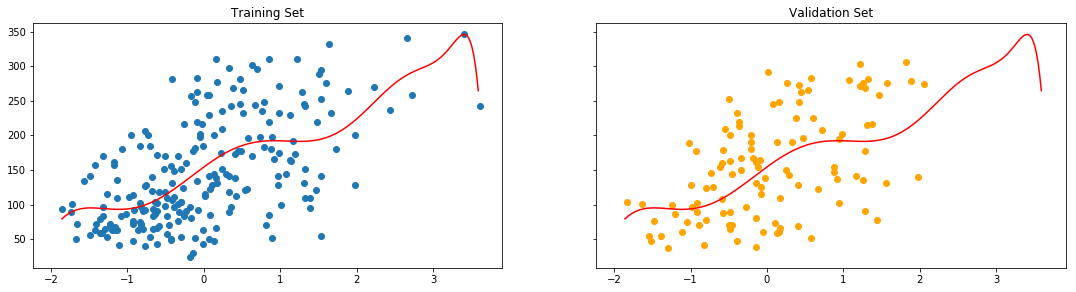

Iteration no. 13, lambda_ridge = 0.00390625, Mean Train RSS = 3648.9200871097246, Mean Validation RSS = 4173.488037623366


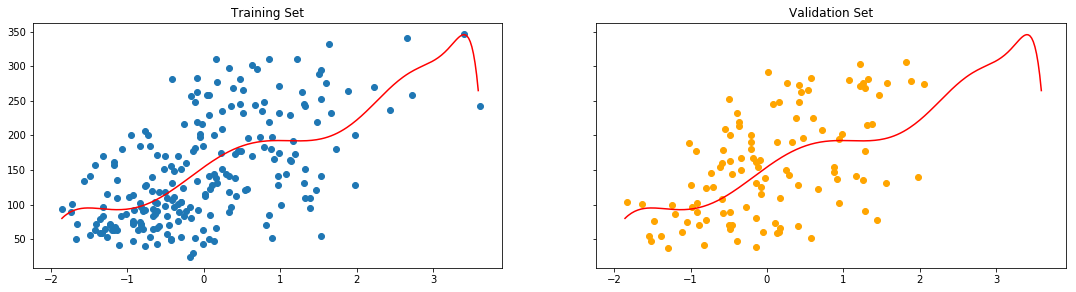

Iteration no. 14, lambda_ridge = 0.0078125, Mean Train RSS = 3651.7571702661144, Mean Validation RSS = 4162.1545166084015


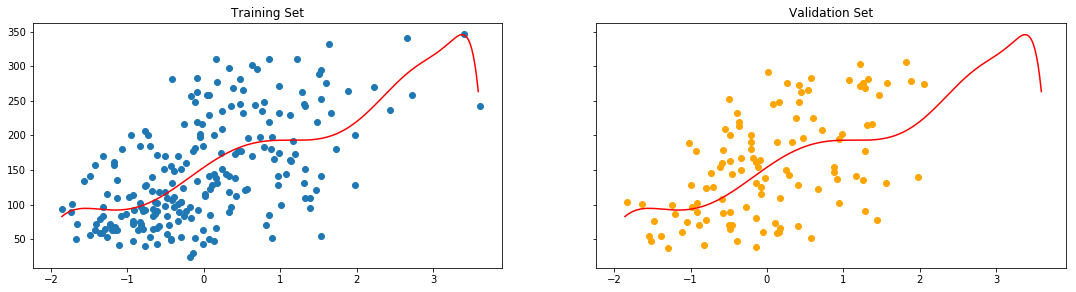

Iteration no. 15, lambda_ridge = 0.015625, Mean Train RSS = 3656.2285540522776, Mean Validation RSS = 4147.407056297644


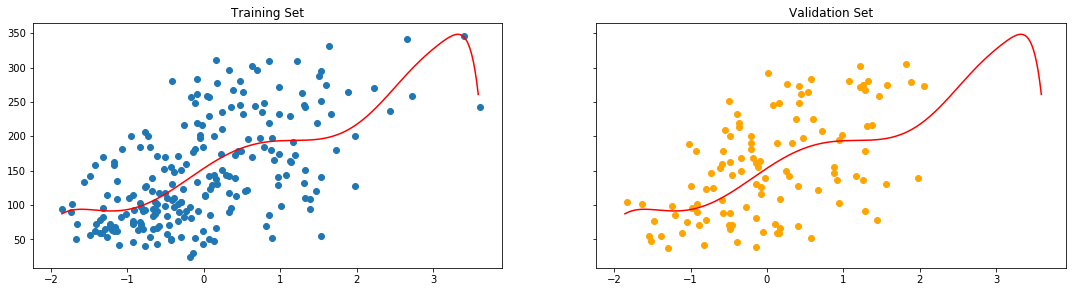

Iteration no. 16, lambda_ridge = 0.03125, Mean Train RSS = 3662.6944494221916, Mean Validation RSS = 4131.573799487189


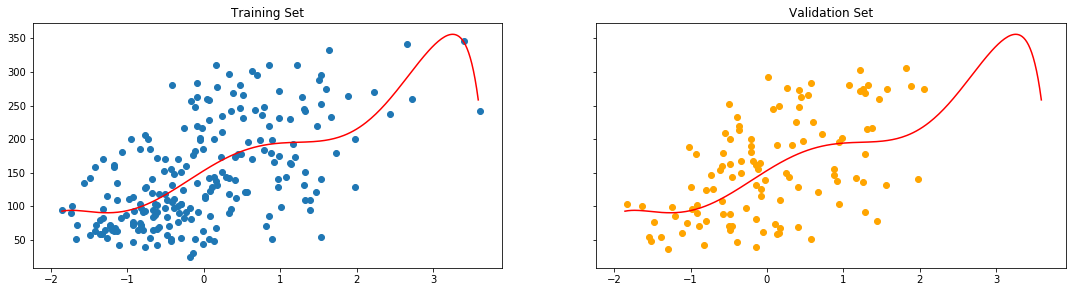

Iteration no. 17, lambda_ridge = 0.0625, Mean Train RSS = 3669.9901236075866, Mean Validation RSS = 4116.356487468674


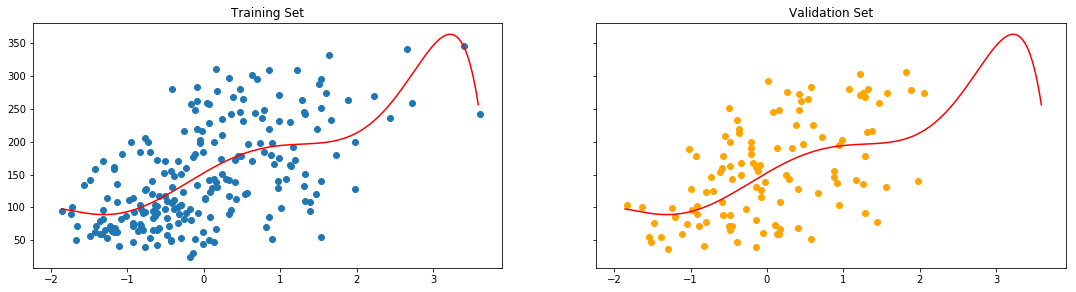

Iteration no. 18, lambda_ridge = 0.125, Mean Train RSS = 3676.767625096616, Mean Validation RSS = 4101.714381304274


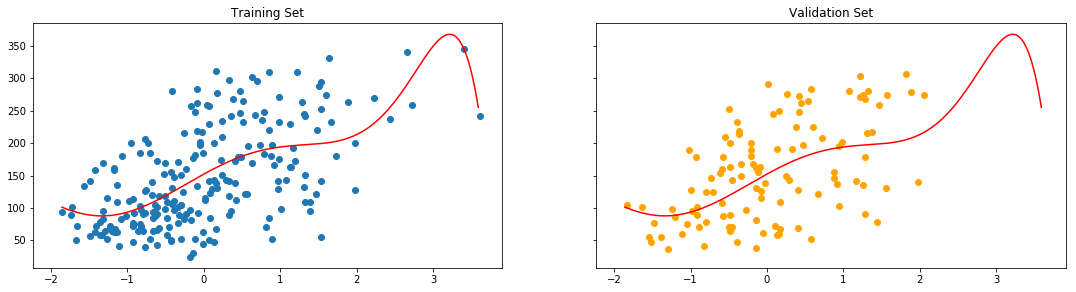

Iteration no. 19, lambda_ridge = 0.25, Mean Train RSS = 3682.9529059459082, Mean Validation RSS = 4087.2692645470474


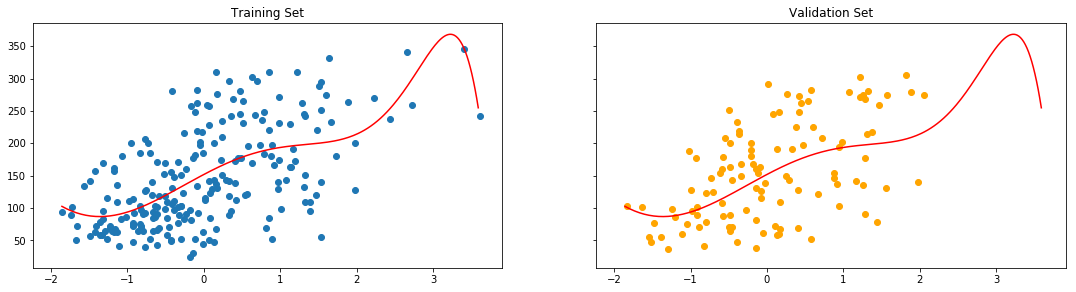

Iteration no. 20, lambda_ridge = 0.5, Mean Train RSS = 3689.7716830472864, Mean Validation RSS = 4073.5634972258385


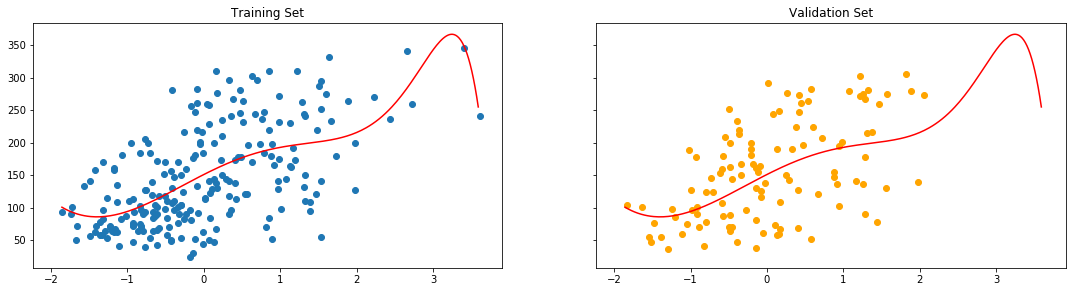

Iteration no. 21, lambda_ridge = 1, Mean Train RSS = 3699.5763595457847, Mean Validation RSS = 4062.8898728355957


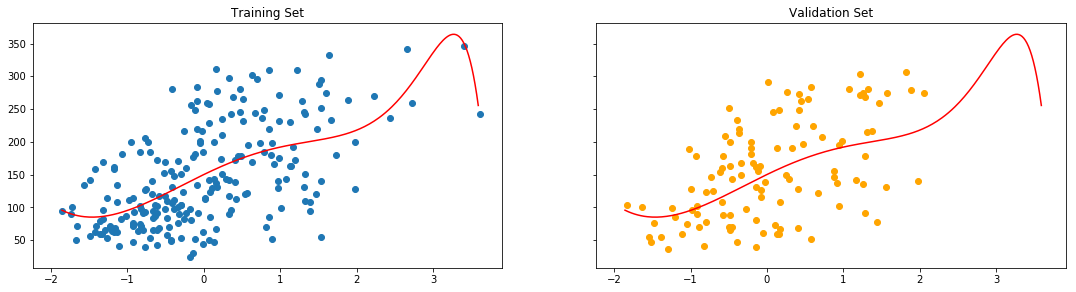

Iteration no. 22, lambda_ridge = 2, Mean Train RSS = 3715.274235811137, Mean Validation RSS = 4060.64961474281


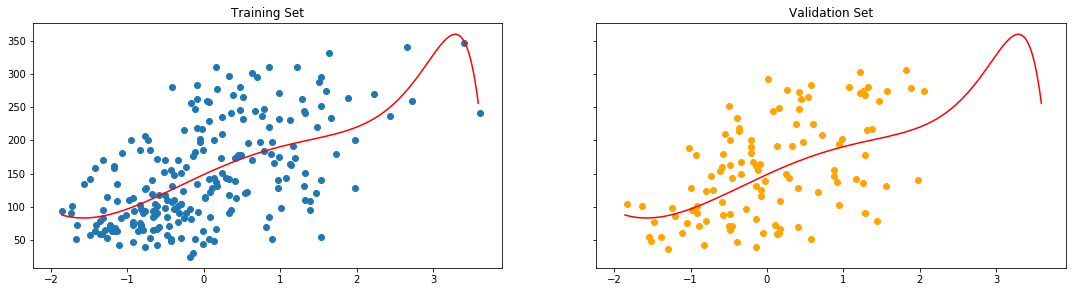

Iteration no. 23, lambda_ridge = 4, Mean Train RSS = 3740.2728981827017, Mean Validation RSS = 4077.2307055398996


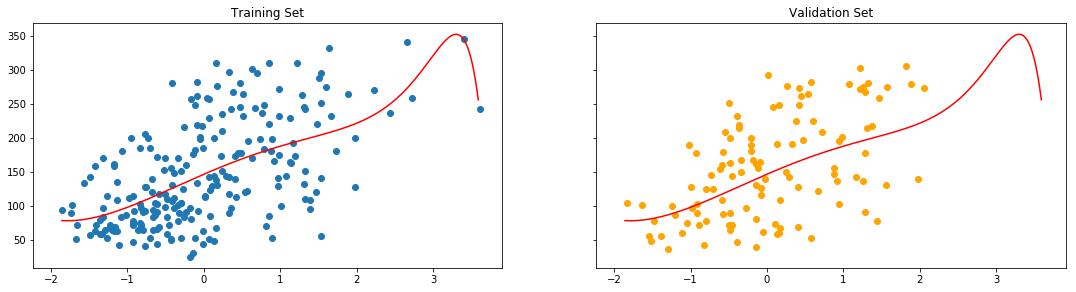

Iteration no. 24, lambda_ridge = 8, Mean Train RSS = 3784.5036551852704, Mean Validation RSS = 4135.195553591175


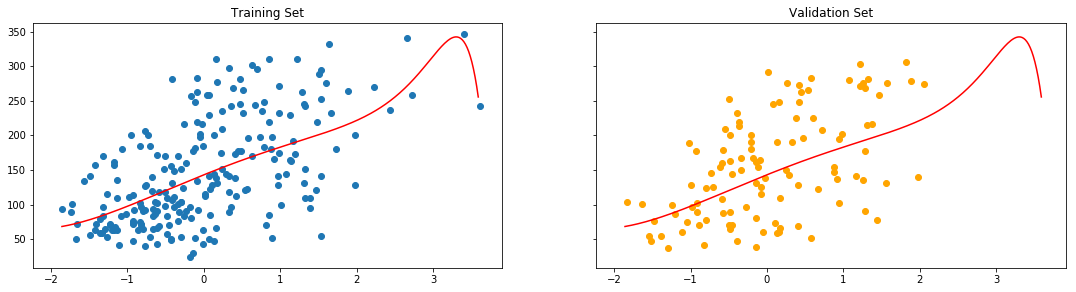

Iteration no. 25, lambda_ridge = 16, Mean Train RSS = 3885.4161541278554, Mean Validation RSS = 4293.56447018717


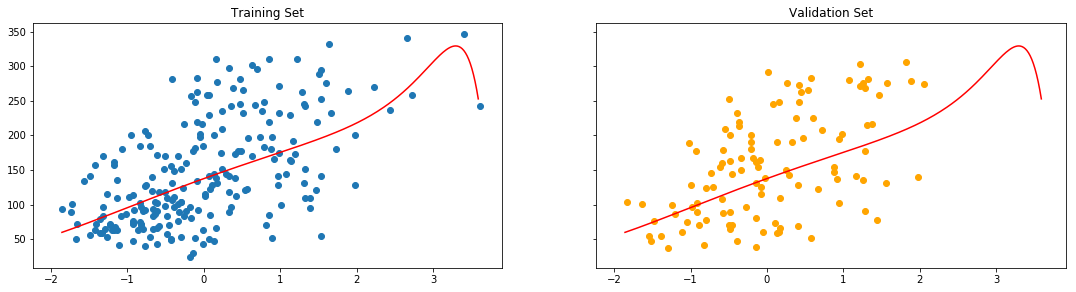

In [1345]:
for lambda_ridge in lambda_ridge_range:
    beta = np.linalg.inv((np.dot(X_diabetes_augmented.T, X_diabetes_augmented)) + lambda_ridge*np.eye(X_diabetes_augmented.shape[1]))
    beta = np.dot(beta, X_diabetes_augmented.T)
    beta = np.dot(beta, y_diabetes_train)

    loss_train = (y_diabetes_train - np.dot(X_diabetes_augmented, beta))
    loss_train = np.dot(loss_train.T,loss_train) / train_size

    loss_val = (y_diabetes_val - np.dot(X_diabetes_val, beta))
    loss_val = np.dot(loss_val.T,loss_val) / val_size
    validation_loss[loss_val] = lambda_ridge
    
    iteration += 1

    print(f"Iteration no. {iteration}, lambda_ridge = {lambda_ridge}, Mean Train RSS = {loss_train}, Mean Validation RSS = {loss_val}")

    #plot the data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True)
    ax1.scatter(X_diabetes_augmented[:,1], y_diabetes_train, c="C0")
    ax1.set_title('Training Set')
    ax2.scatter(X_diabetes_val[:,1], y_diabetes_val, c="orange")
    ax2.set_title('Validation Set')
    f.set_size_inches(18.5, 4.5)

    #plot the line
    limits = [min(x_diabetes_train), max(x_diabetes_train)]
    x_lim_ = np.arange(limits[0], limits[1], 0.001)
    A_lim_ = create_basis(x_lim_, degree = degree)
    A_lim_[:,1:] = (A_lim_[:,1:] - x_mean) / x_std
    y_lim_ = np.dot(A_lim_, beta)
    ax1.plot(A_lim_[:,1], y_lim_, c="red")
    ax2.plot(A_lim_[:,1], y_lim_, c="red")

    plt.show()

In [1346]:
validation_loss[min(list(validation_loss))]

2